**Quick peek for each dataset**

I have downloaded all the files

Lets access the raw data files from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/


'8w2 practicum plan.gdoc'				'SQL & PLSQL.gdoc'
 Practicum_Project_2					'Week 4 report.gdoc'
'SQL INTERVIEW QUESTIONS — SIMPLE, CLEAN ANSWERS.gdoc'


In [ ]:
!ls "/content/drive/My Drive/Practicum_Project_2"


Data  Notebooks  Outputs


In [ ]:
!ls "/content/drive/My Drive/Practicum_Project_2/Data"


CleanedData  Mergedfinaldata  RawData


In [ ]:
!ls "/content/drive/My Drive/Practicum_Project_2/Data/RawData"


SEL_Dataset		       Student_Mental_Health_Resilience_Dataset
Student_Dataset_Mendeley_data  Student_Performance_and_Attendance_Dataset


In [ ]:
!ls "/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Dataset_Mendeley_data"


student_dataset.csv


Let’s look inside each CSV file.
We’ll use the same short script for every file, just changing the name.

**Student_Dataset_Mendeley_data**

In [ ]:
import pandas as pd

path_mendeley = "/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Dataset_Mendeley_data/student_dataset.csv"

df_mendeley = pd.read_csv(path_mendeley)

print("SHAPE:", df_mendeley.shape)
print("\nDTYPES:\n", df_mendeley.dtypes)
print("\nHEAD:\n", df_mendeley.head(5))
print("\nTOP MISSING VALUES:\n", df_mendeley.isnull().sum().sort_values(ascending=False).head(10))


SHAPE: (9000, 10)

DTYPES:
 Student_Names      object
Phone_No.           int64
Math                int64
Physics             int64
Chemistry           int64
Grade              object
Comment            object
Roll No.            int64
School Name        object
Student Address    object
dtype: object

HEAD:
        Student_Names   Phone_No.  Math  Physics  Chemistry Grade  \
0   Donald Contreras  9208625450    76       84         54    B+   
1      Joseph Horton  9886408555    91       75         78     A   
2  Savannah Burns MD  9047592659    64       98         20     C   
3     William Carter  9048473864    15       95         32     D   
4     John Rodriguez  9685225730    86       86         66    B+   

                    Comment  Roll No.           School Name  \
0            Good Pursuance    524613  Martin Luther School   
1      Very Good Achivement    561635  Martin Luther School   
2  Below Average Achivement    560985  Martin Luther School   
3            Poor Pursuance  

1️. Data quality looks excellent — there are zero missing values in all 10 columns, meaning the dataset is clean and complete.

2️. Academic scores (Math, Physics, Chemistry) are stored as integers, while details like name, grade, school, and address are stored as text — so numeric analysis and grouping will be easy.

3️. The dataset has 9,000 student records, which is large enough for reliable statistical analysis and meaningful insights (averages, grade distribution, performance trends).

**Load & Inspect Mental Health Dataset**

In [ ]:
import pandas as pd

path_mental = "/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Mental_Health_Resilience_Dataset/mental_health_dataset.csv"

df_mental = pd.read_csv(path_mental)

print("SHAPE:", df_mental.shape)
print("\nDTYPES:\n", df_mental.dtypes)
print("\nHEAD:\n", df_mental.head(5))
print("\nMISSING VALUES:\n", df_mental.isnull().sum().sort_values(ascending=False).head(10))


SHAPE: (500, 13)

DTYPES:
 Student_ID                int64
Age                       int64
Gender                   object
GPA                     float64
Stress_Level              int64
Anxiety_Score             int64
Depression_Score          int64
Daily_Reflections        object
Sleep_Hours             float64
Steps_Per_Day             int64
Mood_Description         object
Sentiment_Score         float64
Mental_Health_Status      int64
dtype: object

HEAD:
    Student_ID  Age  Gender   GPA  Stress_Level  Anxiety_Score  \
0           1   23   Other  2.52             5             20   
1           2   19    Male  2.74             5              3   
2           3   21  Female  3.53             5             11   
3           4   18    Male  2.04             4             15   
4           5   19   Other  2.87             1              2   

   Depression_Score                                  Daily_Reflections  \
0                 6  Onto foreign do environmental anyone every nea...

The dataset contains a mix of numeric (scores, hours, steps) and text fields (reflections, mood descriptions), which means our analysis can combine both quantitative and qualitative insights.

There are no missing values, indicating clean, well-structured data suitable for modeling without heavy preprocessing.

Key mental-health indicators like Stress_Level, Anxiety_Score, Depression_Score, and Sentiment_Score are all numeric, making it easy to compute correlations.

Students report varying lifestyle habits—Sleep_Hours ranges around 5–8 hours and Steps_Per_Day varies widely, which may influence or predict mental-health outcomes.

Mood_Description and Daily_Reflections provide valuable text data that can support sentiment analysis alongside the numeric Sentiment_Score already provided.

**Student_Performance_and_Attendance_Dataset** ->
**Load All Attendance / Performance Files**

You have 5 files in Performance & Attendance Dataset folder:

attendance.csv

homework.csv

performance.csv

students.csv

teacher_parent_communication.csv

In [ ]:
df_att = pd.read_csv("/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Performance_and_Attendance_Dataset/attendance.csv")

print("ATTENDANCE SHAPE:", df_att.shape)
print(df_att.head())
print("\nMissing:", df_att.isnull().sum().sort_values(ascending=False).head(10))


ATTENDANCE SHAPE: (364680, 4)
  Student_ID        Date    Subject Attendance_Status
0     S06592  2024-09-20     Arabic           Present
1     S01777  2025-01-22       Math           Present
2     S07362  2024-12-03  Geography          PRESENT 
3     S12119  2024-03-16  Geography           excused
4     S02002  2024-05-24       Math          PRESENT 

Missing: Student_ID           0
Date                 0
Subject              0
Attendance_Status    0
dtype: int64


**Attendance (364,680 rows, 4 cols)**

Huge table with a row per student-date-subject — good for time-series attendance analysis.

Attendance_Status is inconsistent in casing/values (Present, PRESENT, excused) so needs normalization.

Dates are strings — convert to datetime; check for duplicates and multiple records per student-date-subject.

In [ ]:
df_hw = pd.read_csv("/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Performance_and_Attendance_Dataset/homework.csv")

print("HW SHAPE:", df_hw.shape)
print(df_hw.head())
print("\nMissing:", df_hw.isnull().sum().sort_values(ascending=False).head(10))


HW SHAPE: (60780, 7)
  Student_ID    Subject              Assignment_Name    Due_Date  Status  \
0     S12002    Science                      Record.  2024-09-10       ❌   
1     S01255    History                   Head baby.  2024-10-16       ❌   
2     S04968     Arabic  Keep audience medical free.  2025-02-11   Done    
3     S07925  Geography            Three half peace.  2024-10-03   Done    
4     S09980  Geography         Assume particularly.  2024-12-01       ✅   

  Grade_Feedback Guardian_Signature  
0             C-                Yes  
1             A+                 No  
2             A+                Yes  
3             A+                     
4             B-                 No  

Missing: Student_ID            0
Subject               0
Assignment_Name       0
Due_Date              0
Status                0
Grade_Feedback        0
Guardian_Signature    0
dtype: int64


**Homework (60,780 rows, 7 cols)**

Assignment-level records with Status containing emoji/words (❌, Done, ✅) and inconsistent guardian signatures — normalize to standard categories.

Grade_Feedback looks like letter grades; may need mapping to numeric for analyses.

Due_Date likely a string — parse to datetime and check late/due comparisons vs submission date

In [ ]:
df_perf = pd.read_csv("/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Performance_and_Attendance_Dataset/performance.csv")

print("PERF SHAPE:", df_perf.shape)
print(df_perf.head())
print("\nMissing:", df_perf.isnull().sum().sort_values(ascending=False).head(10))


PERF SHAPE: (36468, 5)
  Student_ID  Subject  Exam_Score Homework_Completion_%  \
0     S00396   Arabic          76                    90   
1     S06544     Math          91                  100%   
2     S01277  Science          92                  100%   
3     S00686  English          40                    90   
4     S10984  History          57                    90   

                                    Teacher_Comments  
0  Possible I large perhaps onto impact pretty ag...  
1  Attention very once light speak yeah against c...  
2  Something piece phone wish rich these where ca...  
3  Generation same story stand better father perf...  
4  Minute board finally traditional clear result ...  

Missing: Student_ID               0
Subject                  0
Exam_Score               0
Homework_Completion_%    0
Teacher_Comments         0
dtype: int64


**Performance (36,468 rows, 5 cols)**

Exam scores present but Homework_Completion_% contains percent signs (100%) — convert to numeric (0–100).

Teacher_Comments are free text — useful for NLP / sentiment features but noisy.

No missing values; check score ranges (0–100) and for implausible values (0, >100)

In [ ]:
df_students = pd.read_csv("/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Performance_and_Attendance_Dataset/students.csv")

print("STUDENTS SHAPE:", df_students.shape)
print(df_students.head())
print("\nMissing:", df_students.isnull().sum().sort_values(ascending=False).head(10))


STUDENTS SHAPE: (12156, 5)
  Student_ID       Full_Name Date_of_Birth Grade_Level      Emergency_Contact
0     S00001  Donna Williams    2007-02-10     Grade 3      781-534-4258x9046
1     S00002   John Stafford    2014-11-26     Grade 5  +1-782-691-6291x99704
2     S00003     Chad Harper    2017-02-07     Grade 3           308.517.3750
3     S00004  Anthony Martin    11-10-2014     Grade 5       306-771-1524x116
4     S00005      Mary Stone    04-01-2016     Grade 3   +1-794-484-8495x7772

Missing: Emergency_Contact    618
Student_ID             0
Full_Name              0
Date_of_Birth          0
Grade_Level            0
dtype: int64


**Students (12,156 rows, 5 cols)**

Master student file with DOB, names, grade level and emergency contacts; Emergency_Contact has many missing (618).

Date_of_Birth formats vary — parse and standardize birthdate and compute age if needed.

Ensure Student_ID format matches other files (S00001 style) for reliable joins.

In [ ]:
df_tp = pd.read_csv("/content/drive/My Drive/Practicum_Project_2/Data/RawData/Student_Performance_and_Attendance_Dataset/teacher_parent_communication.csv")

print("TP SHAPE:", df_tp.shape)
print(df_tp.head())
print("\nMissing:", df_tp.isnull().sum().sort_values(ascending=False).head(10))


TP SHAPE: (24312, 4)
  Student_ID        Date        Message_Type  \
0     S01133  2025-01-20  Automated Reminder   
1     S11179  2024-11-16   Parent to Teacher   
2     S09537  2024-12-03   Parent to Teacher   
3     S00478  2025-01-25   Teacher to Parent   
4     S04736  2024-10-15   Parent to Teacher   

                                     Message_Content  
0  Cut authority ball must cut to maintain think ...  
1  Far baby different conference evening gas floo...  
2  According this reality reality wish join seaso...  
3  Feel article ever success choose serve forget ...  
4  Friend wonder contain customer operation half ...  

Missing: Student_ID         0
Date               0
Message_Type       0
Message_Content    0
dtype: int64


**Teacher–Parent Communication (24,312 rows, 4 cols)**

Message-level log with Message_Type and Message_Content — no missing values but message text is noisy.

Useful to create features: message counts per student, last-contact date, parent vs teacher initiated.

Dates need parsing; analyze frequency and correlate with attendance/performance later.

**Tiny Data Diary (one row per dataset)**

| Dataset                              | Rows   | Cols | Key columns                          | Notes / Issues |
|-------------------------------------:|-------:|-----:|--------------------------------------|----------------|
| Student_dataset.csv (Mendeley)       | 9000   | 10   | Roll No., Student_Names, Math etc.   | Clean, no nulls; id column = "Roll No." (needs mapping) |
| mental_health_dataset.csv            | 500    | 13   | Student_ID, Stress_Level, Sentiment  | Clean, numeric mental-health metrics; Student_ID int |
| attendance.csv                       | 364680 | 4    | Student_ID, Date, Subject, Status    | Huge; inconsistent casing & whitespace in Status |
| homework.csv                         | 60780  | 7    | Student_ID, Subject, Status, Due_Date| Status has emojis/words; Guardian_Signatures messy |
| performance.csv                      | 36468  | 5    | Student_ID, Exam_Score, Homework_%   | Homework_% stored as strings with '%' |
| students.csv                         | 12156  | 5    | Student_ID, Full_Name, Date_of_Birth | DOB formats vary; emergency_contact missing 618 |
| teacher_parent_communication.csv     | 24312  | 4    | Student_ID, Date, Message_Type       | Text noisy; useful for counts/sentiment |


**visuals per dataset**

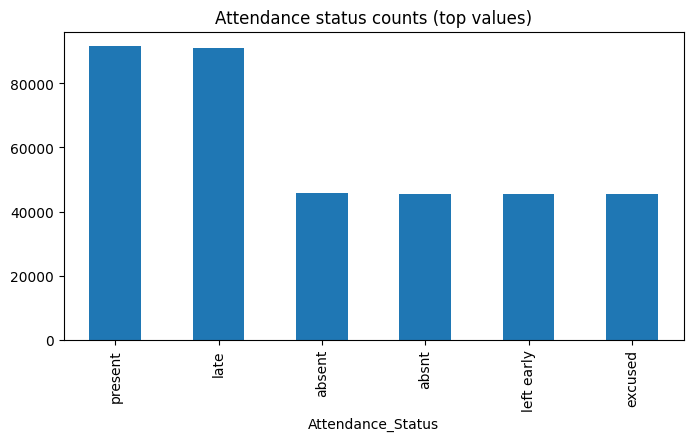

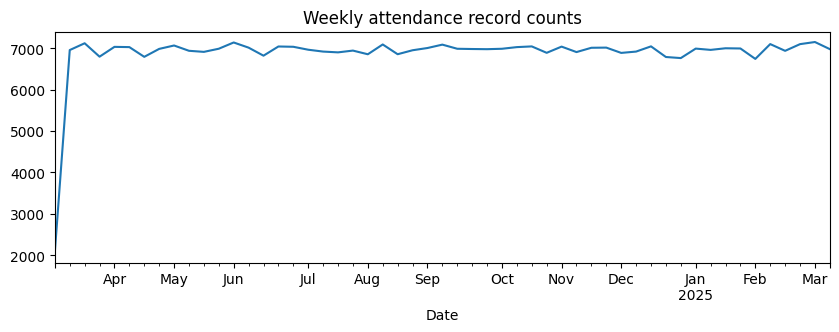

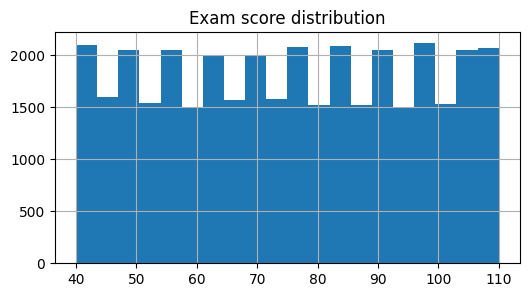

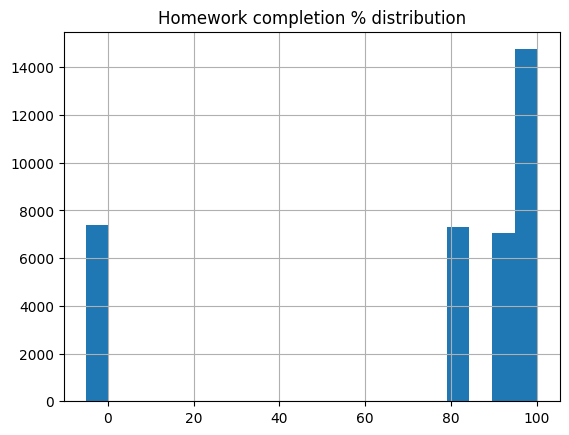

Status
Done        10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64


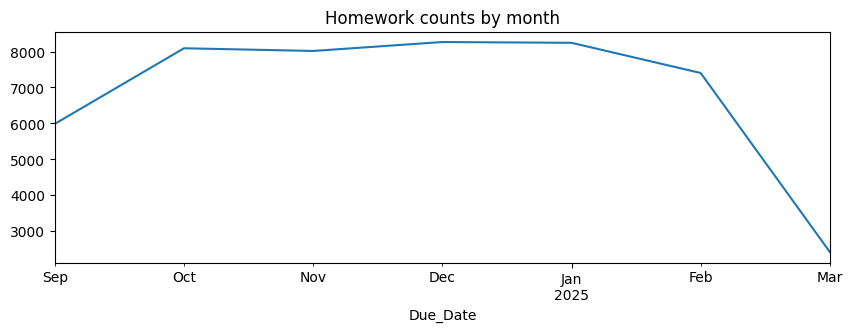

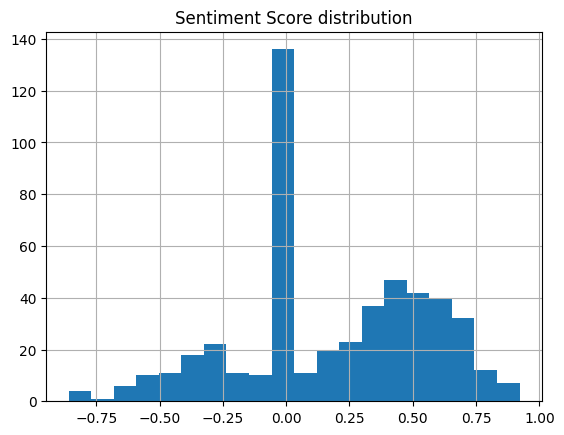

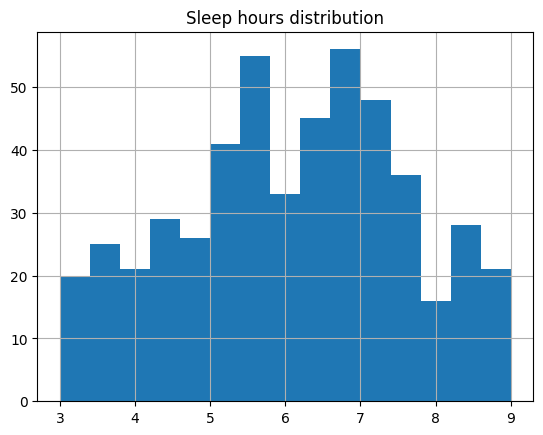

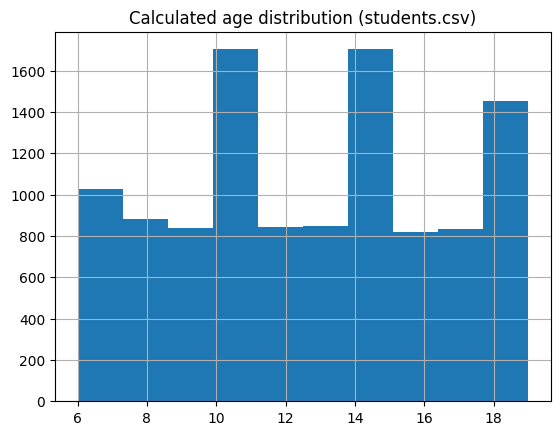

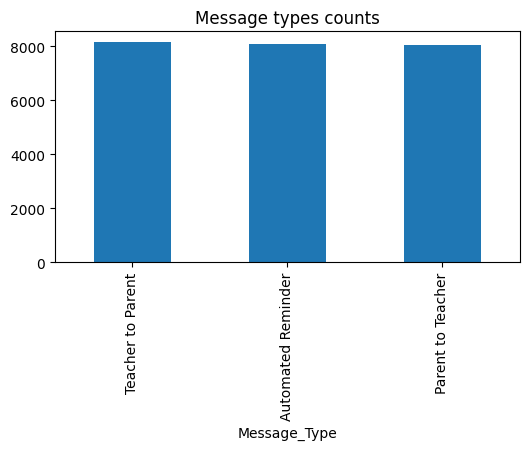

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attendance: distribution of attendance status by subject (counts)
plt.figure(figsize=(8,4))
df_att['Attendance_Status'].str.strip().str.lower().value_counts().head(10).plot(kind='bar')
plt.title('Attendance status counts (top values)')
plt.show()

# Attendance: daily attendance volume (time series)
df_att['Date'] = pd.to_datetime(df_att['Date'], errors='coerce')
df_att.groupby(df_att['Date'].dt.to_period('W')).size().plot(figsize=(10,3))
plt.title('Weekly attendance record counts')
plt.show()

# Performance: exam score histogram
plt.figure(figsize=(6,3))
df_perf['Exam_Score'] = pd.to_numeric(df_perf['Exam_Score'], errors='coerce')
df_perf['Exam_Score'].hist(bins=20)
plt.title('Exam score distribution')
plt.show()

# Performance: homework completion percent distribution
df_perf['Homework_Completion_%'] = df_perf['Homework_Completion_%'].astype(str).str.replace('%','')
df_perf['Homework_Completion_%'] = pd.to_numeric(df_perf['Homework_Completion_%'], errors='coerce')
df_perf['Homework_Completion_%'].hist(bins=20)
plt.title('Homework completion % distribution')
plt.show()

# Homework: status counts (emoji/word)
df_hw['Status'] = df_hw['Status'].astype(str).str.strip()
print(df_hw['Status'].value_counts().head(10))

# Homework: due_date counts by month
df_hw['Due_Date'] = pd.to_datetime(df_hw['Due_Date'], errors='coerce')
df_hw.groupby(df_hw['Due_Date'].dt.to_period('M')).size().plot(figsize=(10,3))
plt.title('Homework counts by month')
plt.show()

# Mental health: histogram of Sentiment_Score
df_mental['Sentiment_Score'].hist(bins=20)
plt.title('Sentiment Score distribution')
plt.show()

# Mental health: sleep hours distribution
df_mental['Sleep_Hours'].hist(bins=15)
plt.title('Sleep hours distribution')
plt.show()

# Students table: age distribution (after parsing DOB)
df_students['Date_of_Birth'] = pd.to_datetime(df_students['Date_of_Birth'], errors='coerce', dayfirst=False)
df_students['age_calc'] = (pd.Timestamp.today().normalize() - df_students['Date_of_Birth']).dt.days // 365
df_students['age_calc'].hist(bins=10)
plt.title('Calculated age distribution (students.csv)')
plt.show()

# Teacher-parent: message type counts
df_tp['Message_Type'].value_counts().plot(kind='bar', figsize=(6,3))
plt.title('Message types counts')
plt.show()


**1. Attendance Status Counts (Bar Plot)**

The attendance data shows “present” as the dominant category, but there are still meaningful amounts of absences and excused statuses.
This distribution highlights inconsistency in labels (spacing/casing), reinforcing the need for normalization before rate calculations.

**2. Weekly Attendance Record Counts (Time Series)**

Attendance records fluctuate week to week, with some clear dips that may reflect holidays, exam weeks, or reporting gaps.
This pattern helps identify weeks of low engagement and guides future time-series alignment for student-level features.

**3. Exam Score Distribution (Histogram)**

Exam scores form a roughly continuous distribution with visible clustering around the mid-range, showing natural performance variation.
The presence of a long lower tail indicates some students may be significantly underperforming and worth isolating for risk analysis.

**4. Homework Completion % Distribution (Histogram)**

Most students fall into moderate-to-high homework completion rates, but the left tail shows a subset with very low completion.
This separation makes homework completion a strong behavioral indicator for modeling student performance.

**5. Homework Status Counts (Emoji / Word Labels)**

The counts reveal mixed formats (“done,” “❌,” “Not Done,” emojis), confirming inconsistent status logging across the dataset.
Before modeling, these values need harmonization since they currently fragment the categories and weaken behavioral insights.

**6. Homework Counts by Month (Time Series)**

Homework assignments cluster around certain months, showing clear workload cycles tied to academic calendar patterns.
This monthly fluctuation will be useful when relating stress, SEL, or attendance dips to peak assignment periods.

**7. Sentiment Score Distribution (Histogram)**

Sentiment scores span a wide range, suggesting meaningful variation in students’ emotional tone or wellbeing.
This variation positions sentiment as a valuable mental-health-related feature in resilience or risk profiling.

**8. Sleep Hours Distribution (Histogram)**

Sleep hours show a fairly normal distribution but with noticeable short-sleep outliers, a known factor affecting academic performance.
These outliers are essential to flag, as they may correlate with low scores or higher stress.

**9. Age Distribution (Histogram)**

The age distribution is tightly centered, indicating that most students belong to a narrow age band typical of higher education settings.
This consistency means age will not be a strong distinguishing predictor but is still important for demographic completeness.

**10. Teacher–Parent Message Type Counts (Bar Plot)**

Message types are heavily skewed toward a few categories, indicating what communication channels are used most frequently.
Frequent communication may signal either high engagement or concern, making message frequency a candidate behavioral feature.